# Simple VBP example

In [1]:
from __future__ import print_function
from IPython.display import SVG

## Mid-level API

In [2]:
from pyvpsolver import VPSolver, VBP, AFG, MPS

Define a VBP instance:

In [3]:
W = (5180, 9)
w = [(1120,1), (1250,1), (520,1), (1066,1), (1000,1), (1150,1)]
b = [9, 5, 91, 18, 11, 64]
instance = VBP(W, w, b)

Build an arc-flow graph for the VBP instance:

In [4]:
afg = AFG(instance)

VPSolver 3.0.1, Copyright (C) 2013-2016, Filipe Brandao
Build (method = -3)
  #dp: 140
  Step-3' Graph: 40 vertices and 131 arcs (0.00s)
  Step-4' Graph: 29 vertices and 109 arcs (0.00s)
  #V4/#V3 = 0.72
  #A4/#A3 = 0.83
Ready! (0.00s)


Draw the arc-flow graph for the VBP instance:

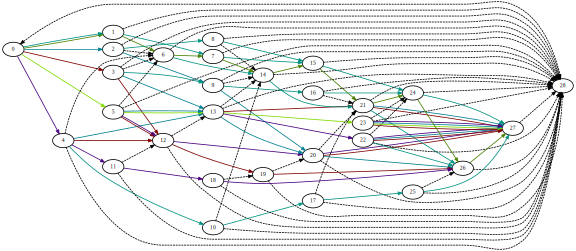

In [5]:
afg.draw("graph_vbp.svg", graph_attrs={"size": "8,8"})
SVG("graph_vbp.svg")

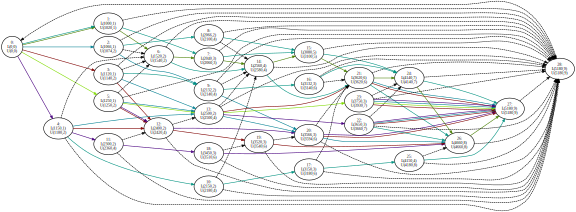

In [6]:
afg.draw("graph_vbp_lpaths.svg", lpaths=True, graph_attrs={"size": "8,8"})
SVG("graph_vbp_lpaths.svg")

Solve the VBP instance:

In [7]:
output, solution = VPSolver.script("vpsolver_glpk.sh", instance)

Copyright (C) 2013-2016, Filipe Brandao

>>> vbp2afg...
VPSolver 3.0.1, Copyright (C) 2013-2016, Filipe Brandao
Build (method = -3)
  #dp: 140
  Step-3' Graph: 40 vertices and 131 arcs (0.00s)
  Step-4' Graph: 29 vertices and 109 arcs (0.00s)
  #V4/#V3 = 0.72
  #A4/#A3 = 0.83
Ready! (0.00s)

>>> afg2mps...
VPSolver 3.0.1, Copyright (C) 2013-2016, Filipe Brandao
Generating the .MPS model...DONE!

>>> solving the MIP model using GLPK...
Note: different parameter settings may improve the performance substantially!
GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 --mps /tmp/i6KqwBQgmi/model.mps --seed 1234 -o /tmp/i6KqwBQgmi/sol.out
Reading problem data from `/tmp/i6KqwBQgmi/model.mps'...
Problem: ARCFLOW
Objective: OBJ
36 rows, 109 columns, 282 non-zeros
109 integer variables, none of which are binary
441 records were read
GLPK Integer Optimizer, v4.52
36 rows, 109 columns, 282 non-zeros
109 integer variables, none of which are binary
Preprocessing...
35 rows

In [8]:
obj, patterns = solution
print("Obj: {}".format(obj))
print("Solution: {}".format(patterns))

Obj: 33
Solution: [[(2, [(0, 0), (0, 0), (1, 0), (2, 0), (5, 0)]), (1, [(1, 0), (3, 0), (3, 0), (5, 0)]), (2, [(1, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (5, 0)]), (1, [(0, 0), (2, 0), (5, 0), (5, 0), (5, 0)]), (14, [(2, 0), (5, 0), (5, 0), (5, 0), (5, 0)]), (4, [(0, 0), (2, 0), (3, 0), (3, 0), (3, 0)]), (2, [(2, 0), (2, 0), (3, 0), (3, 0), (4, 0), (4, 0)]), (7, [(2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (4, 0)])]]


Pretty-print the VBP solution:

In [9]:
from pyvpsolver.solvers import vbpsolver
vbpsolver.print_solution(solution)

Objective: 33
Solution:
2 x [i=1, i=1, i=2, i=3, i=6]
1 x [i=2, i=4, i=4, i=6]
2 x [i=2, i=3, i=3, i=3, i=3, i=3, i=6]
1 x [i=1, i=3, i=6, i=6, i=6]
14 x [i=3, i=6, i=6, i=6, i=6]
4 x [i=1, i=3, i=4, i=4, i=4]
2 x [i=3, i=3, i=4, i=4, i=5, i=5]
7 x [i=3, i=3, i=3, i=3, i=3, i=3, i=3, i=3, i=5]


## High-level API

In [10]:
from pyvpsolver.solvers import vbpsolver

Solve the VBP instance using the high level API:

In [11]:
solution = vbpsolver.solve(W, w, b, script="vpsolver_glpk.sh")

Copyright (C) 2013-2016, Filipe Brandao

>>> vbp2afg...
VPSolver 3.0.1, Copyright (C) 2013-2016, Filipe Brandao
Build (method = -3)
  #dp: 140
  Step-3' Graph: 40 vertices and 131 arcs (0.00s)
  Step-4' Graph: 29 vertices and 109 arcs (0.00s)
  #V4/#V3 = 0.72
  #A4/#A3 = 0.83
Ready! (0.00s)

>>> afg2mps...
VPSolver 3.0.1, Copyright (C) 2013-2016, Filipe Brandao
Generating the .MPS model...DONE!

>>> solving the MIP model using GLPK...
Note: different parameter settings may improve the performance substantially!
GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 --mps /tmp/0RUpFewHNf/model.mps --seed 1234 -o /tmp/0RUpFewHNf/sol.out
Reading problem data from `/tmp/0RUpFewHNf/model.mps'...
Problem: ARCFLOW
Objective: OBJ
36 rows, 109 columns, 282 non-zeros
109 integer variables, none of which are binary
441 records were read
GLPK Integer Optimizer, v4.52
36 rows, 109 columns, 282 non-zeros
109 integer variables, none of which are binary
Preprocessing...
35 rows

In [12]:
vbpsolver.print_solution(solution)

Objective: 33
Solution:
2 x [i=1, i=1, i=2, i=3, i=6]
1 x [i=2, i=4, i=4, i=6]
2 x [i=2, i=3, i=3, i=3, i=3, i=3, i=6]
1 x [i=1, i=3, i=6, i=6, i=6]
14 x [i=3, i=6, i=6, i=6, i=6]
4 x [i=1, i=3, i=4, i=4, i=4]
2 x [i=3, i=3, i=4, i=4, i=5, i=5]
7 x [i=3, i=3, i=3, i=3, i=3, i=3, i=3, i=3, i=5]
